### Steps
######  Exploring our data and visualization
###### Train and create a linear Regression model
###### Evaluate our model
###### Make predictions
###### Calculate RMSE
###### What if we consider more or less feature

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
data = pd.read_csv('/root/data/house_sales.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

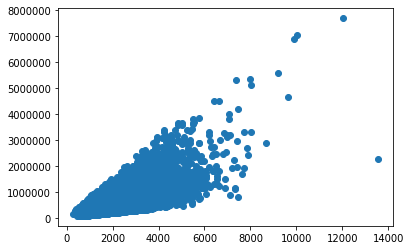

In [8]:
plt.scatter(x='sqft_living', y='price', data=data)

Text(0, 0.5, 'Price of house')

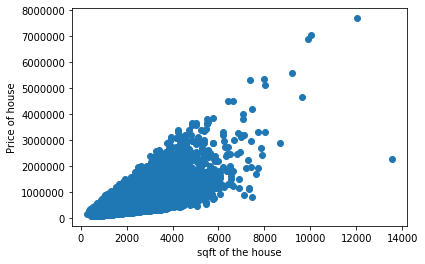

In [9]:
plt.scatter(data.sqft_living, data.price)
plt.xlabel('sqft of the house')
plt.ylabel('Price of house')

<Figure size 720x432 with 0 Axes>

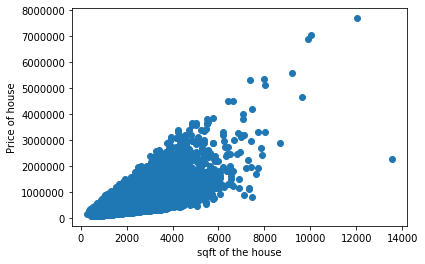

<Figure size 720x432 with 0 Axes>

In [10]:
plt.scatter(data.sqft_living, data.price)
plt.xlabel('sqft of the house')
plt.ylabel('Price of house')
plt.figure(figsize=(10,6)) # To change to figure size

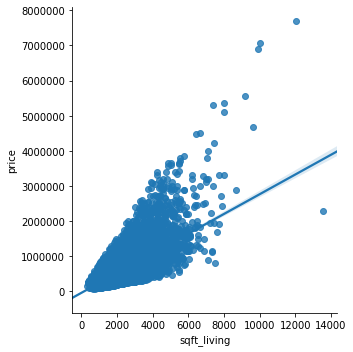

In [11]:
sns.lmplot(x='sqft_living', y='price', data=data)

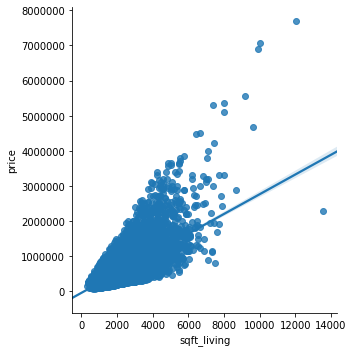

In [12]:
sns.lmplot('sqft_living', 'price', data=data)

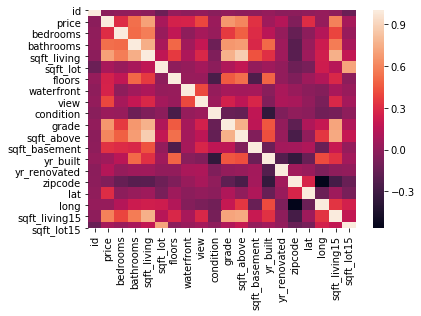

In [13]:
sns.heatmap(data.corr())

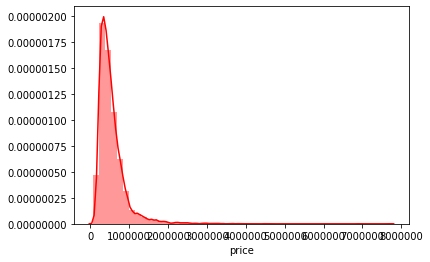

In [14]:
sns.distplot(data['price'], color='red')

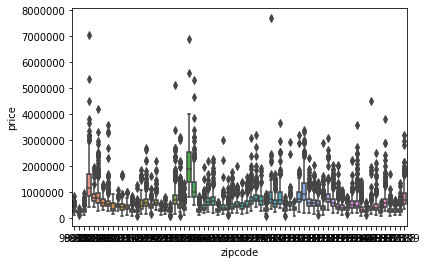

In [15]:
sns.boxplot('zipcode', 'price', data=data)

In [16]:
data.info

<bound method DataFrame.info of                id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       

In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
X = data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']]

In [19]:
y=data['price']

In [20]:
X.shape

(21613, 14)

In [21]:
y.shape

(21613,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [24]:
X_train.shape

(15129, 14)

In [25]:
y_train.shape

(15129,)

In [26]:
X_test.shape

(6484, 14)

In [27]:
y_test.shape

(6484,)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression() # To create a linear regression instance of a class

In [30]:
model.fit(X_train, y_train) # IT will trian linear model by use of the train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction= model.predict(X_test) # Testing dataset to predict

In [32]:
prediction

array([229802.21057709, 774461.83816666, 729756.14521362, ...,
       305416.77601124, 304644.28130006, 343694.73728567])

In [33]:
model.intercept_

10715385.491728872

In [34]:
model.coef_

array([-4.26527269e+04,  4.36934934e+04,  1.17163110e+02, -2.75362307e-01,
        3.33189021e+04,  5.92840754e+05,  4.44918699e+04,  1.79744240e+04,
        1.21489620e+05,  5.55081144e+01,  6.16549964e+01, -3.64739809e+03,
        1.42872296e+01, -4.43497098e+01])

In [35]:
y_pred = pd.DataFrame(data['price'],prediction)
#y_pred

In [36]:
data.shape

(21613, 21)

In [37]:
prediction.shape

(6484,)

In [38]:
prediction[1]

774461.8381666597

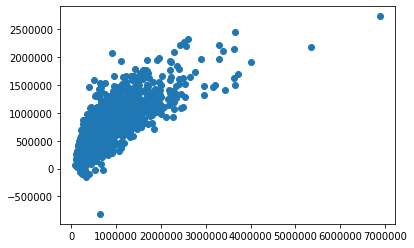

In [39]:
plt.scatter(y_test, prediction)

<Figure size 1440x1152 with 0 Axes>

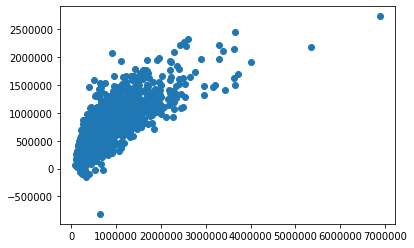

<Figure size 1440x1152 with 0 Axes>

In [40]:
plt.scatter(y_test, prediction)
plt.figure(figsize = (20,16))

In [41]:
X.shape

(21613, 14)

In [42]:
model.coef_

array([-4.26527269e+04,  4.36934934e+04,  1.17163110e+02, -2.75362307e-01,
        3.33189021e+04,  5.92840754e+05,  4.44918699e+04,  1.79744240e+04,
        1.21489620e+05,  5.55081144e+01,  6.16549964e+01, -3.64739809e+03,
        1.42872296e+01, -4.43497098e+01])

In [43]:
dframe_coef = pd.DataFrame(model.coef_ , X.columns, columns=['coefficient value'])

In [44]:
dframe_coef

,coefficient value
bedrooms,-42652.726878
bathrooms,43693.493363
sqft_living,117.163110
sqft_lot,-0.275362
floors,33318.902118
waterfront,592840.754419
view,44491.869855
condition,17974.424020
grade,121489.619971
sqft_above,55.508114


In [45]:
model.intercept_

10715385.491728872

### Root-mean-Square Method
The lower the RMSE, the better the model

In [46]:
from sklearn import metrics

In [47]:
mean_sq_error = metrics.mean_squared_error(y_test, prediction)

In [48]:
np.sqrt(mean_sq_error)

220417.68632558486

In [49]:
RMSE = mean_sq_error
RMSE

48583956445.12392

## Model 2

In [50]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
X = data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','yr_built', 'zipcode']]
y = data['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [53]:
model2 = LinearRegression()

In [54]:
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
prediction2 = model2.predict(X_test)

In [56]:
prediction2[1]

718281.2079604873

In [57]:
prediction[1]

774461.8381666597

In [59]:
data['price']

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [60]:
mean_sq_error2 = metrics.mean_squared_error(y_test, prediction2)

In [61]:
RMSE2 = np.sqrt(mean_sq_error2)

In [62]:
RMSE2

248257.0852332813

In [63]:
RMSE

48583956445.12392

The second model predicts better than the first model on average since it has lower RMSE

In [64]:
prediction2

array([134839.28272582, 718281.20796049, 740215.29019692, ...,
       331717.83006131, 426839.57554303, 423192.85681431])

In [65]:
prediction2.shape

(6484,)

### BUild another model using more features and compare RMSE

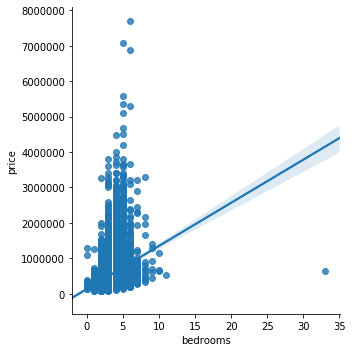

In [66]:
sns.lmplot(x= 'bedrooms', y='price', data=data)

In [67]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [68]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [69]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

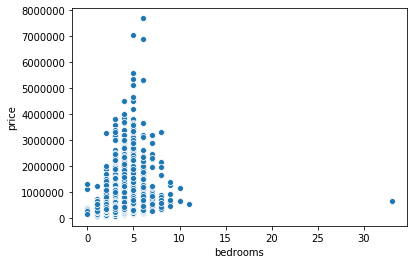

In [70]:
sns.scatterplot('bedrooms','price',data=data)

In [71]:
import matplotlib.pyplot as plt

In [72]:
def estimate_coeff(x,y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)
    ss_xy = np.sum(y*x - n*mean_y*mean_x)
    ss_xx = np.sum(x*x - n*mean_x*mean_y)
    b1 = ss_xy/ ss_xx
    b0 = mean_y - b1*mean_x
    return(b0, b1)


In [73]:
def plot_regression_line(x,y,b):
    plt.scatter(x,y,color='r',marker='o')
    y_pred = b[0]+b[1]*x
    plt.plot(x,y_pred,color='g')
    plt.xlabel('sizes')
    plt.ylabel('cost')
    plt.show()

In [74]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([300,350,500,400,700,800,1000,1100,1300,1500])

In [75]:
b = estimate_coeff(x,y)
b

(790.1863275840362, 0.8752131665388622)

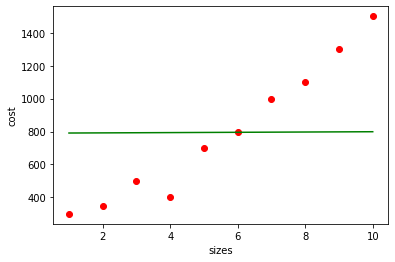

In [76]:
plot_regression_line(x,y,b)

In [77]:
import pandas as pd
head = pd.read_csv('/root/data/headbrain.csv')

In [78]:
head.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [79]:
head.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


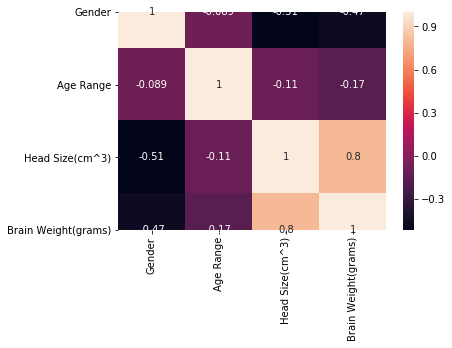

In [80]:
import seaborn as sns
sns.heatmap(head.corr(),annot=True)

In [81]:
head.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

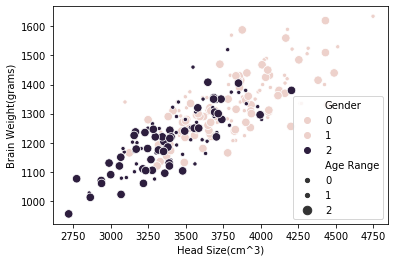

In [82]:
sns.scatterplot('Head Size(cm^3)','Brain Weight(grams)',hue='Gender', size='Age Range', data=head, color='g')

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [84]:
x = head[['Head Size(cm^3)','Gender', 'Age Range']]
y = head['Brain Weight(grams)']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=222)

In [86]:
x_train.shape

(165, 3)

In [87]:
y_train.shape

(165,)

In [88]:
x_test.shape

(72, 3)

In [89]:
y_train.shape

(165,)

In [90]:
model = LinearRegression()


In [91]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
pred = model.predict(x_test)

In [94]:
r2_score(y_test,pred)

0.608219093013115

### XGB Regerssor

In [95]:
from xgboost import XGBRegressor

In [96]:
model = XGBRegressor()

In [97]:
model.fit(X_train, y_train)

XGBoostError: [20:47:41] /workspace/src/objective/regression_obj.cu:60: Check failed: preds.Size() == info.labels_.Size() (15129 vs. 165) : labels are not correctly providedpreds.size=15129, label.size=165
Stack trace:
  [bt] (0) /root/anaconda3/lib/python3.7/site-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x54) [0x7fc544275614]
  [bt] (1) /root/anaconda3/lib/python3.7/site-packages/xgboost/./lib/libxgboost.so(xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0x187) [0x7fc544520797]
  [bt] (2) /root/anaconda3/lib/python3.7/site-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x376) [0x7fc5443619a6]
  [bt] (3) /root/anaconda3/lib/python3.7/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x29) [0x7fc544264639]
  [bt] (4) /root/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7fc5918ffec0]
  [bt] (5) /root/anaconda3/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7fc5918ff87d]
  [bt] (6) /root/anaconda3/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7fc591b14ede]
  [bt] (7) /root/anaconda3/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(+0x12914) [0x7fc591b15914]
  [bt] (8) /root/anaconda3/bin/python(_PyObject_FastCallKeywords+0x49b) [0x55789e8658fb]



In [98]:
import pandas_profiling as pp